<a href="https://colab.research.google.com/github/Whaleman0423/-Python-book-practice/blob/main/Linebot_Django.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# !pip list # 沒有Django

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### 引用 os 套件 ，準備來建立資料夾用的

In [17]:
import os

###### 安裝Django套件

In [18]:
!pip install Django

###### 改變路徑到 MyDrive
###### 在 MyDrive 新增一個放專案的資料夾

In [19]:
path = "/content/drive/MyDrive"
os.chdir(path) 

folder_path = "/content/drive/MyDrive/賴機器人的Django資料夾"  # 要新增的資料夾路徑
if os.path.isdir(folder_path):   # 確認資料夾是否存在
  print("放專案的資料夾已建立")
else:  # 不存在 => 建立一個
  os.mkdir(folder_path)

path = "/content/drive/MyDrive/賴機器人的Django資料夾"   # 進入到我們的專案資料夾
os.chdir(path) 

放專案的資料夾已建立


###### 建立Django專案語法

In [20]:

!django-admin startproject firstproject  # 建立專案 如果早已建立 會回傳CommandError 已存在專案


CommandError: '/content/drive/MyDrive/賴機器人的Django資料夾/firstproject' already exists


###### 進入(切換) firstproject 

In [21]:
# cd firstproject
path = "./firstproject"
os.chdir(path) 
# cd 又壞掉了 不可使用

###### 建立Application

In [22]:
!python manage.py startapp myapp # 若已存在APP則會出現CommandError 要我們更換app名 不用管他

CommandError: 'myapp' conflicts with the name of an existing Python module and cannot be used as an app name. Please try another name.


###### 建立 templates 資料夾
###### 書上教的 md templates 建立資料夾，是沒用的
###### 因此換成os.mkdir(path)

In [23]:
template_path = "./templates" 
if os.path.isdir(template_path):   # 確認資料夾是否存在  
  print("templates資料夾早已建立")
else:
  os.mkdir(template_path) # 不存在 就建立一個

templates資料夾早已建立


###### 建立 static 資料夾

In [24]:
static_path = "./static" 
if not os.path.isdir(static_path):   # 確認資料夾是否存在
  os.mkdir(static_path)
else:
  print("static資料夾早已建立")

static資料夾早已建立


###### templates 和 static 兩個資料夾和 myapp 是平行的
###### 建立在專案的最上層目錄

###### 建立 migration

In [25]:
!python manage.py makemigrations

Traceback (most recent call last):
  File "manage.py", line 22, in <module>
    main()
  File "manage.py", line 18, in main
    execute_from_command_line(sys.argv)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/__init__.py", line 419, in execute_from_command_line
    utility.execute()
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/__init__.py", line 413, in execute
    self.fetch_command(subcommand).run_from_argv(self.argv)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/base.py", line 354, in run_from_argv
    self.execute(*args, **cmd_options)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/base.py", line 393, in execute
    self.check()
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/base.py", line 423, in check
    databases=databases,
  File "/usr/local/lib/python3.7/dist-packages/django/core/checks/registry.py", line 76, in run_checks
    new_errors = check(app_configs=

###### 模型與資料庫同步

In [26]:
!python manage.py migrate

Traceback (most recent call last):
  File "manage.py", line 22, in <module>
    main()
  File "manage.py", line 18, in main
    execute_from_command_line(sys.argv)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/__init__.py", line 419, in execute_from_command_line
    utility.execute()
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/__init__.py", line 413, in execute
    self.fetch_command(subcommand).run_from_argv(self.argv)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/base.py", line 354, in run_from_argv
    self.execute(*args, **cmd_options)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/base.py", line 398, in execute
    output = self.handle(*args, **options)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/base.py", line 89, in wrapped
    res = handle_func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/django/core/management/commands/migrate.py", line 

###### migrate完成後會在專案的最上層目錄下，建立<db.sqlite3>檔，這個檔案就是Django預設的資料庫檔案

###### https://medium.com/@arsindoliya/running-django-on-google-colab-ea9392cdee86
###### 缺少下面這個步驟 !!! 會無法連接運行網址
###### 將透過下面 eval所產生的網址 來連接我們的網頁
###### 並且 需要在 /content/firstproject/firstproject/settings.py
###### 裡面的ALLOWED_HOSTS 清單內 新增'colab.research.google.com'
###### ALLOWED_HOSTS = ['colab.research.google.com']

In [27]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8000)"))

https://r1zltwcufw-496ff2e9c6d22116-8000-colab.googleusercontent.com/


###### 啟動Server

In [31]:
!python manage.py runserver 

Watching for file changes with StatReloader
Performing system checks...

System check identified no issues (0 silenced).
October 19, 2021 - 22:54:46
Django version 3.2.8, using settings 'firstproject.settings'
Starting development server at http://127.0.0.1:8000/
Quit the server with CONTROL-C.
[19/Oct/2021 22:54:52] "GET / HTTP/1.1" 200 13
Not Found: /favicon.ico
[19/Oct/2021 22:54:53] "GET /favicon.ico HTTP/1.1" 404 2574
[19/Oct/2021 22:55:08] "GET /hello4/%E8%96%9B%E5%AE%87%E7%9D%BF/ HTTP/1.1" 200 418
[19/Oct/2021 22:55:09] "GET /static/css/style.css HTTP/1.1" 200 45
[19/Oct/2021 22:55:09] "GET /static/images/ball.jpg HTTP/1.1" 200 13741
Not Found: /favicon.ico
[19/Oct/2021 22:55:09] "GET /favicon.ico HTTP/1.1" 404 2574


#### 打開 firstproject 裡面的 settings.py 進行設定:

##### 除錯模式設定: 
##### DEBUG = True 預設為除錯模式
##### 真正上線部署 需改成 False 增加網站的安全

##### 加入 Application 應用程式:
##### 在 INSTALLED_APPS 清單中 下面加一項 app 的名子("myapp",)


```
# INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'myapp',  # 新增的 app
]
```



##### 設定 template 路徑
##### 上層要import os上面要import os


```
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [os.path.join(BASE_DIR, 'templates')], # 加上 templates 路徑
        'APP_DIRS': True,
        ......
```



##### 設定語系與時區:
##### 預設語系是英文語系，需改成 中文語系， 台北時區。


```
LANGUAGE_CODE = 'zh-Hant'  # 改成繁體中文

TIME_ZONE = 'Asia/Taipei' # 改為台北時區

```






##### 設定 static 靜態檔的路徑:
##### 加入 3 行在 STATIC_URL = '/static/' 下面


```
STATIC_URL = '/static/'
STATICFILES_DIRS = [   # 加入這三行 加入static路徑
  os.path.join(BASE_DIR, 'static'),
]
```



##### 設定 urls.py
##### 1. 設定  < urls.py > urlpatterns 串列中 url網址和函式的對照
##### 2. 在< views.py> 中撰寫函式
##### 打開urls.py

```
from django.contrib import admin
from django.urls import path
from django.conf.urls import url
from myapp.views import sayhello
urlpatterns = [
    path('admin/', admin.site.urls),
    url(r'^$', sayhello),
]

```



##### 打開 myapp 資料夾中的 <views.py> 
##### 加入 sayhello()自定義函式

```
from django.shortcuts import render
from django.http import HttpResponse

def sayhello(request):
  return HttpResponse("Hello Django!") 

# Create your views here.

```



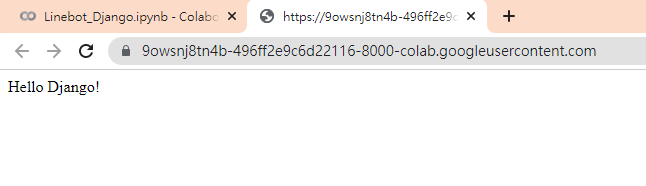

##### 2.4.4 傳送參數

##### 到hello2/李曉明/
##### 傳送參數李曉明
##### 打開 urls.py


```
from myapp.views import sayhello, hello2 #上面加上hello2
urlpatterns = [
    path('admin/', admin.site.urls),
    url(r'^$', sayhello),
    url(r'^hello2/(\w+)/$', hello2),  # 加入此行
]

```

##### 打開 myapp 的 views.py 編輯


```
def hello2(request, username):
  return HttpResponse("Hello " + username)
```

##### 在網址後面輸入 /hello2/XXX/ 就會顯示名字



 ##### 模板的使用
 ##### 在 templates 資料夾 新增 <hello3.html>
 ##### 並新增內容，內容如下:

```
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>第一個模板</title>
</head>
<body>
  <h1> 歡迎光臨 : {{username}} </h1>
  <h2> 現在時刻 : {{now}} </h2>
</body>
</html>
```
##### 模板中，讀取變數的語法為 {{變數}}
##### 打開 urls.py
##### 匯入 hello3
##### 定義 hello3 如下:


```
from myapp.views import sayhello, hello2, hello3
urlpatterns = [
    path('admin/', admin.site.urls),
    url(r'^$', sayhello),
    url(r'^hello2/(\w+)/$', hello2),
    url(r'^hello3/(\w+)/$', hello3),
    
]
```
##### 最後再定義 hello3 自訂程序
##### 打開 myapp 的 views.py
##### 以 username 接收參數，使用 render 函式呼叫顯示<hello3.html> 模板 同時將參數傳遞給 <hello3.html>模板


```
from django.shortcuts import render
from datetime import datetime

def hello3(request, username):
  now = datetime.now()
  return render(request, "hello3.html", locals())
  
```



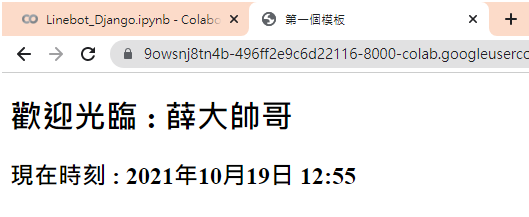

##### 加入 static 靜態檔案
##### 在 <static> 資料夾下新增 <images> 資料夾
##### 並將一圖片檔放在 <images> 資料夾中
##### 同時新增一個 <css> 資料夾 
##### 然後將 <style.css> 檔 放在 <css> 資料夾


###### 打開urls.py
```
from myapp.views import sayhello, hello2, hello3, hello4
urlpatterns = [
    path('admin/', admin.site.urls),
    url(r'^$', sayhello),
    url(r'^hello2/(\w+)/$', hello2),
    url(r'^hello3/(\w+)/$', hello3),
    url(r'^hello4/(\w+)/$', hello4),
```
###### 打開views.py

```
def hello4(request, username):
  now = datetime.now()
  return render(request, "hello4.html", locals())
```
###### 新增在templates 一個 hello4.html

```
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>顯示圖片的模板</title>
  {% load static %}  #不可以打 staticfiles 不支援了
  <link href="{% static "css/style.css" %}" rel="stylesheet" type="text/css" />
</head>
<body>
  <div id="home">
    <img src="{% static "images/ball.jpg" %}" alt="歡迎光臨" width="32" height="32" />
    <span class="info"> 歡迎光臨: {{username}}</span>
    <h2> 現在時刻:{{now}} </h2>
  </div>
</body>
</html>
```

######static/css/style.css

```
.info {
  color:red;
  font-size: 1.5em;
}
```



